In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
df=pd.read_csv("Customer Purchasing Behaviors.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Customer Purchasing Behaviors.csv'

In [117]:
df.info 

<bound method DataFrame.info of      user_id  age  annual_income  purchase_amount  loyalty_score region  \
0          1   25          45000              200            4.5  North   
1          2   34          55000              350            7.0  South   
2          3   45          65000              500            8.0   West   
3          4   22          30000              150            3.0   East   
4          5   29          47000              220            4.8  North   
..       ...  ...            ...              ...            ...    ...   
233      234   40          60000              450            7.2   West   
234      235   38          59000              430            6.9  North   
235      236   54          74000              630            9.4  South   
236      237   32          52000              360            5.8   West   
237      238   31          51000              340            5.6  North   

     purchase_frequency  
0                    12  
1              

In [118]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [119]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
user_id,238.0,119.500000,68.848868,1.0,60.25,119.5,178.750,238.0
age,238.0,38.676471,9.351118,22.0,31.00,39.0,46.750,55.0
annual_income,238.0,57407.563025,11403.875717,30000.0,50000.00,59000.0,66750.000,75000.0
purchase_amount,238.0,425.630252,140.052062,150.0,320.00,440.0,527.500,640.0
loyalty_score,238.0,6.794118,1.899047,3.0,5.50,7.0,8.275,9.5
purchase_frequency,238.0,19.798319,4.562884,10.0,17.00,20.0,23.000,28.0


In [120]:
df.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [121]:
df.shape

(238, 7)

# Univariate Analysis 

In [122]:
df2 = df["age"]

In [123]:
# We see that there are no null columns
df2.isna().sum()

np.int64(0)

In [124]:
df2.describe()

count    238.000000
mean      38.676471
std        9.351118
min       22.000000
25%       31.000000
50%       39.000000
75%       46.750000
max       55.000000
Name: age, dtype: float64

In [125]:
# Finding IQR 
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

IQR = Q3 - Q1

# Finding the lower and upper bounds
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print('IQR:', IQR)
print('Q1:', Q1)
print('Q3:', Q3)
# Finding the number of outliers

outliers = df2[(df2 < lower_bound) | (df2 > upper_bound)]

# Multiple outliers found with the IQR method

outliers

Lower Bound: 7.375
Upper Bound: 70.375
IQR: 15.75
Q1: 31.0
Q3: 46.75


Series([], Name: age, dtype: int64)

In [127]:
print("Number of outliers: ", outliers.shape[0])
print("Percentage of outliers: ", (outliers.shape[0]/df2.shape[0])*100)

Number of outliers:  0
Percentage of outliers:  0.0


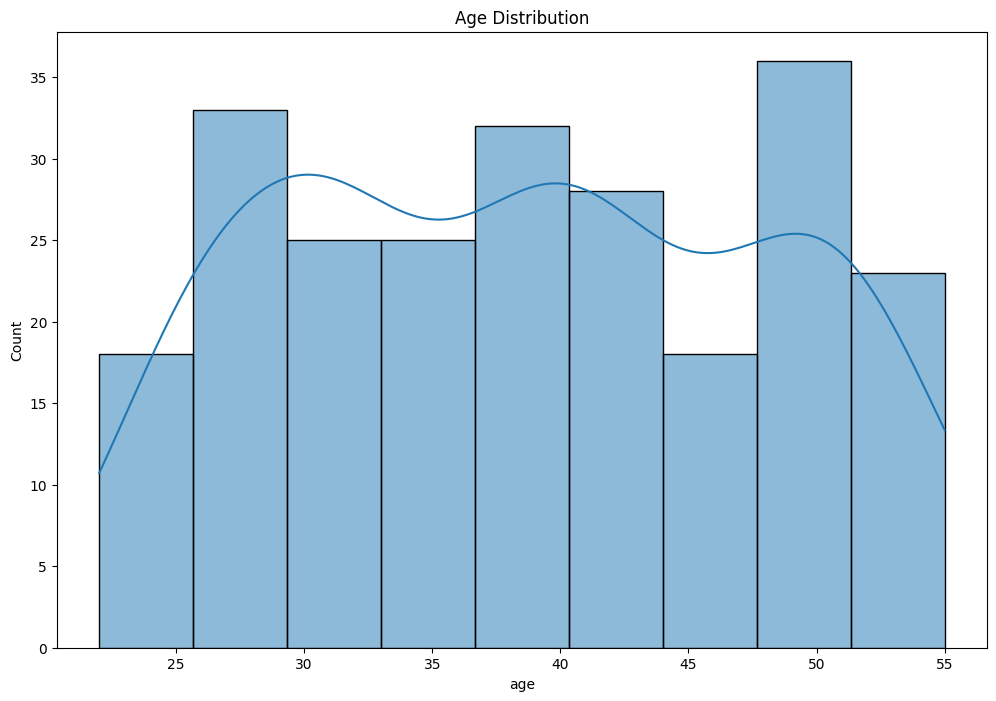

In [133]:
plt.figure(figsize=(12,8))
sns.histplot(df2, kde=True)
plt.title('Age Distribution')
plt.show()

#####  The data seems to have several prominent age groups, with concentrations around the ages of 30, 40, and 50, and some age ranges with fewer individuals, such as around 45. 

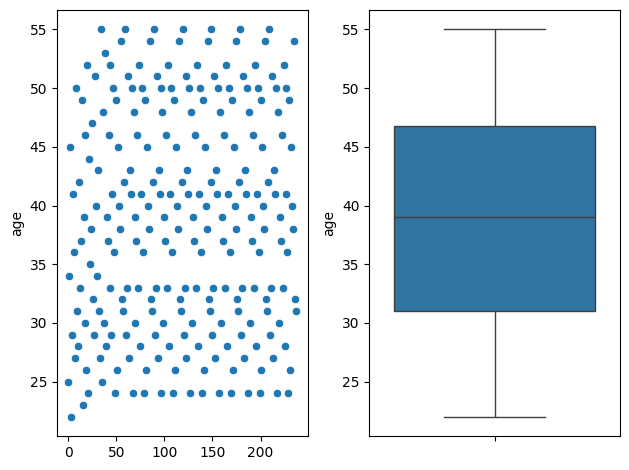

In [134]:
plt.subplot(1, 2, 1)
sns.scatterplot(df2)
plt.subplot(1, 2, 2)
sns.boxplot(df2)
plt.tight_layout()
plt.show()


##### The boxplot seems fairly symmetrical, with the median close to the center of the IQR and whiskers of nearly equal length.
##### The central tendency (median) is around 40, and most individuals fall between 35 and 45 years of age.

In [131]:
# Z-score method
z_scores = stats.zscore(df2)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
print("Number of outliers: ", outliers.sum())


Number of outliers:  0


In [169]:
# Z-score method
z_scr = stats.zscore(df2)
abs_z_scr = np.abs(z_scr)
outliers = (abs_z_scr > 3)
print("Number of outliers: ", outliers.sum())


Number of outliers:  0


<Axes: xlabel='age', ylabel='Count'>

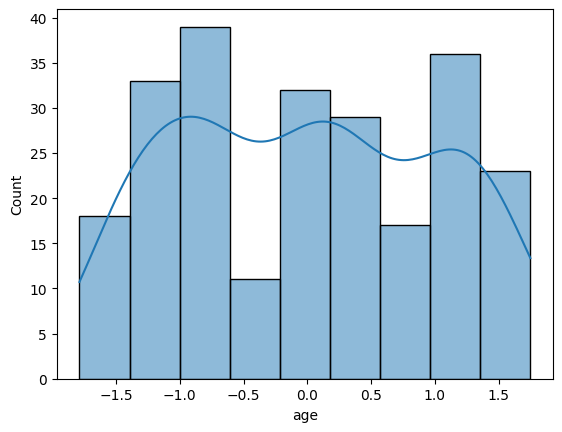

In [170]:
sns.histplot(z_scr, kde=True)

##### The age data follows a roughly normal distribution with most Z-scores centered around 0, indicating that most values are close to the mean, without extreme deviations.

# Bivariate Analysis


In [139]:
df = df.loc[:, ['age', 'purchase_amount']]

In [140]:
# Checking for duplicates and missing values
print(df.duplicated())
print(df.isna().sum())

df.describe()

0      False
1      False
2      False
3      False
4      False
       ...  
233     True
234     True
235     True
236     True
237     True
Length: 238, dtype: bool
age                0
purchase_amount    0
dtype: int64


,age,purchase_amount
count,238.000000,238.000000
mean,38.676471,425.630252
std,9.351118,140.052062
min,22.000000,150.000000
25%,31.000000,320.000000
50%,39.000000,440.000000
75%,46.750000,527.500000
max,55.000000,640.000000


In [141]:
df.corr()

,age,purchase_amount
age,1.00000,0.98614
purchase_amount,0.98614,1.00000


In [143]:
#Anova Testing
f_statistic, p_value = stats.f_oneway(df['age'], df['purchase_amount'])
print('F statistic:', f_statistic)
print('P value:', p_value)
# p value is less than 0.05, we reject the null hypothesis that the two columns are independent
# The two columns depend upon each other.

F statistic: 1808.7740405963814
P value: 6.574702111278258e-164


<Axes: xlabel='age', ylabel='purchase_amount'>

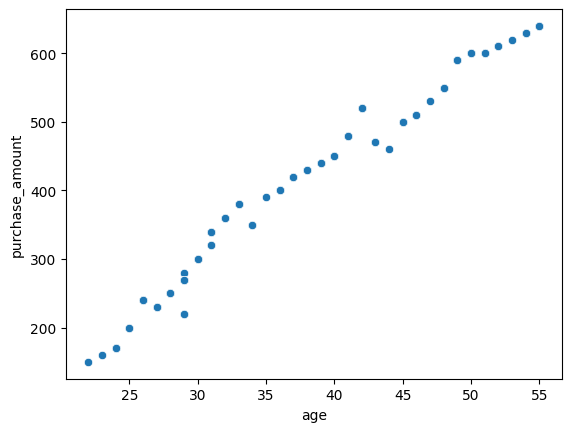

In [146]:
sns.scatterplot(x="age",y="purchase_amount",data=df)

# Multivariate Analysis

In [148]:
df=pd.read_csv("Customer Purchasing Behaviors.csv")

In [151]:
df = df.loc[:, ['age', 'purchase_amount', 'region']]
df.head()

,age,purchase_amount,region
0,25,200,North
1,34,350,South
2,45,500,West
3,22,150,East
4,29,220,North


In [152]:
df.isnull().sum()

age                0
purchase_amount    0
region             0
dtype: int64

In [154]:
df.dtypes

age                 int64
purchase_amount     int64
region             object
dtype: object

In [164]:
df['region'] = df['region'].astype('category')

In [165]:
no_of_regions = df['region'].unique()
print(no_of_regions)
print('Number of regions:', len(no_of_regions))

['North', 'South', 'West', 'East']
Categories (4, object): ['East', 'North', 'South', 'West']
Number of regions: 4


In [166]:
# Encoding the categorial variables according to "no_of_regions"
df['region'] = df['region'].apply(lambda x: np.where(no_of_regions == x)[0][0])
df['region'].value_counts()

region
0    78
1    77
2    77
3     6
Name: count, dtype: int64

<Axes: >

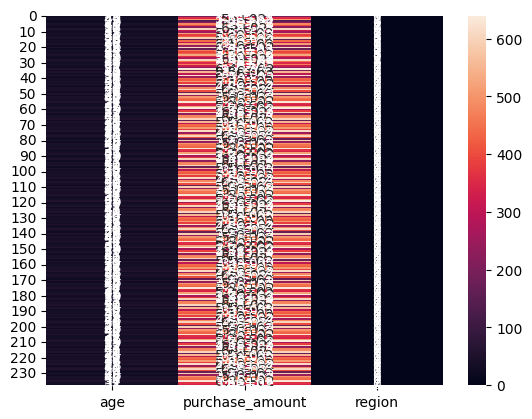

In [167]:

sns.heatmap(df, annot=True)

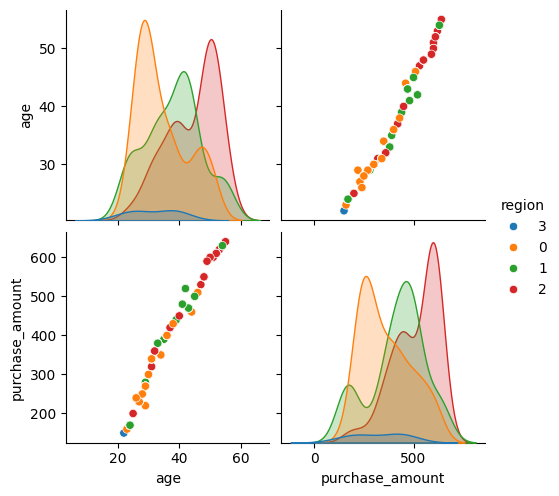

In [168]:
sns.pairplot(df, hue='region')